## Problema de Negócio

Temos um conjunto de dados bancários com características como idade do cliente, experiência, renda, escolaridade e se ele possui cartão de crédito ou não.

O banco quer construir uma máquina preditiva com aprendizado de máquina que os ajudará a identificar os **clientes em potencial com maior probabilidade de adquirir um empréstimo pessoal.**

**Instalando PyCaret em sua máquina**

In [1]:
!pip3 install pycaret

     |████████████████████████████████| 264 kB 7.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.7 MB 56.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 167 kB 7.4 MB/s 
     |████████████████████████████████| 111 kB 68.1 MB/s 
     |████████████████████████████████| 14.6 MB 87 kB/s 
     |████████████████████████████████| 80 kB 10.5 MB/s 
     |████████████████████████████████| 2.0 MB 37.6 MB/s 
     |████████████████████████████████| 271 kB 79.8 MB/s 
     |████████████████████████████████| 1.3 MB 6.5 MB/s 
     |████████████████████████████████| 56 kB 5.6 MB/s 
     |████████████████████████████████| 6.8 MB 17.6 MB/s 
     |████████████████████████████████| 248 kB 66.0 MB/s 
     |████████████████████████████████| 10.1 MB 51.9 MB/s 
     |████████████████████████████████| 636 kB 72.0 MB/s 
     |████████

**Instalando a Biblioteca de Interpretabilidade do Modelo**

In [2]:
!pip install shap

     |████████████████████████████████| 356 kB 7.6 MB/s eta 0:00:01
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491659 sha256=2aa3fb57bfa62d425b5a8de0c6187d1eb8fc5c7054f43adbb65f858baac53271
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


In [3]:
# importing pandas to read the CSV file
import pandas as pd
# read the data
data_classification = pd.read_csv('https://raw.githubusercontent.com/lakshay-arora/PyCaret-Example/master/datasets/loan_train_data.csv')
# view the top rows of the data
data_classification.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,3510,38,12,61,91330,3,0.9,3,0,0,0,0,0,0
1,1129,30,5,171,94025,2,1.9,2,0,1,0,0,0,0
2,1637,65,39,100,92122,4,1.7,3,0,0,0,0,0,1
3,3165,28,4,82,95136,4,0.0,1,0,0,0,0,1,1
4,3563,32,8,169,94596,1,6.5,3,272,1,1,1,1,0


In [4]:
data_classification.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,3510,38,12,61,91330,3,0.9,3,0,0,0,0,0,0
1,1129,30,5,171,94025,2,1.9,2,0,1,0,0,0,0
2,1637,65,39,100,92122,4,1.7,3,0,0,0,0,0,1
3,3165,28,4,82,95136,4,0.0,1,0,0,0,0,1,1
4,3563,32,8,169,94596,1,6.5,3,272,1,1,1,1,0


In [5]:
# Verificando a Versão do Pycaret
from pycaret.utils import version
version()

'2.3.3'

**Importando um Módulo:**

 Dependendo do tipo de problema que você vai resolver, primeiro você precisa importar o módulo. Na primeira versão do PyCaret, 6 módulos diferentes estão disponíveis - regressão, classificação, clustering, processamento de linguagem natural (PNL), detecção de anomalias e regra de mineração associada. Neste artigo, vamos resolver um problema de classificação e, portanto, vamos importar o módulo de classificação

**Inicializando a configuração :**

 O PyCaret executa algumas tarefas básicas de pré-processamento, como ignorar os IDs e as colunas de data, imputar os valores ausentes, codificar as variáveis ​​categóricas e dividir o conjunto de dados na divisão de teste e treino para o restante das etapas de modelagem . Quando você executa a função de configuração, ela primeiro confirma os tipos de dados e, em seguida, se você pressionar enter, criará o ambiente para você prosseguir

In [6]:
from pycaret import classification

In [7]:
classification_setup = classification.setup(data= data_classification, target='Personal Loan')

,Description,Value
0,session_id,4487
1,Target,Personal Loan
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(4000, 14)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


**Treinando um modelo**  

Treinar um modelo no PyCaret é bastante simples. Você só precisa usar a função **create_model** que leva apenas um parâmetro - a abreviação do modelo como uma string. 

Aqui, vamos primeiro treinar um modelo de árvore de decisão para o qual temos que passar **“ dt ”** e ele retornará uma tabela com pontuações de **validação cruzada k-fold** de métricas de avaliação comuns usadas para modelos de classificação.

Aqui está um lembrete rápido das **métricas de avaliação** usadas para aprendizagem supervisionada:

**Classificação**: precisão, AUC, recall, precisão, F1, Kappa
**Regressão**:  MAE, MSE, RMSE, R2, RMSLE, MAPE

In [8]:
# Criando o Modelo (Máquina Preditiva)
classification_dt = classification.create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9714,0.9325,0.8846,0.8214,0.8519,0.8361,0.8368
1,0.9679,0.8960,0.8077,0.8400,0.8235,0.8059,0.8060
2,0.9821,0.9211,0.8462,0.9565,0.8980,0.8882,0.8902
3,0.9714,0.9152,0.8462,0.8462,0.8462,0.8304,0.8304
4,0.9679,0.9132,0.8462,0.8148,0.8302,0.8124,0.8126
5,0.9821,0.9556,0.9231,0.8889,0.9057,0.8958,0.8960
6,0.9750,0.8826,0.7692,0.9524,0.8511,0.8376,0.8433
7,0.9750,0.9172,0.8462,0.8800,0.8627,0.8490,0.8492
8,0.9893,0.9775,0.9630,0.9286,0.9455,0.9395,0.9397
9,0.9821,0.9384,0.8846,0.9200,0.9020,0.8921,0.8923


In [9]:
# Criando Agrupamentos Boosting 
boosting = classification.ensemble_model(classification_dt, method= 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9714,0.9325,0.8846,0.8214,0.8519,0.8361,0.8368
1,0.9750,0.9172,0.8462,0.8800,0.8627,0.8490,0.8492
2,0.9821,0.9384,0.8846,0.9200,0.9020,0.8921,0.8923
3,0.9750,0.9344,0.8846,0.8519,0.8679,0.8541,0.8543
4,0.9679,0.8787,0.7692,0.8696,0.8163,0.7988,0.8006
5,0.9750,0.9517,0.9231,0.8276,0.8727,0.8589,0.8605
6,0.9821,0.9038,0.8077,1.0000,0.8936,0.8840,0.8900
7,0.9750,0.8999,0.8077,0.9130,0.8571,0.8435,0.8454
8,0.9893,0.9775,0.9630,0.9286,0.9455,0.9395,0.9397
9,0.9821,0.9384,0.8846,0.9200,0.9020,0.8921,0.8923


In [10]:
# Comparando diversas Máquinas Preditivas
classification.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9875,0.9972,0.9001,0.9628,0.9303,0.9234,0.9241,0.354
lightgbm,Light Gradient Boosting Machine,0.9871,0.9965,0.8925,0.9678,0.9277,0.9206,0.9221,0.139
rf,Random Forest Classifier,0.9846,0.9957,0.8427,0.9911,0.9102,0.9019,0.9058,0.563
et,Extra Trees Classifier,0.9818,0.9908,0.8121,0.9907,0.8912,0.8814,0.8874,0.508
dt,Decision Tree Classifier,0.9764,0.9249,0.8617,0.8849,0.8717,0.8587,0.8597,0.018
ada,Ada Boost Classifier,0.9686,0.9802,0.7547,0.8960,0.8166,0.7996,0.8046,0.166
lda,Linear Discriminant Analysis,0.9468,0.9616,0.6170,0.7700,0.6788,0.6505,0.6587,0.020
ridge,Ridge Classifier,0.9382,0.0000,0.3490,0.9698,0.5084,0.4837,0.5584,0.014
lr,Logistic Regression,0.9207,0.9327,0.3833,0.6200,0.4658,0.4269,0.4444,0.072
knn,K Neighbors Classifier,0.9050,0.5992,0.0266,0.2417,0.0478,0.0362,0.0601,0.121


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=4487, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

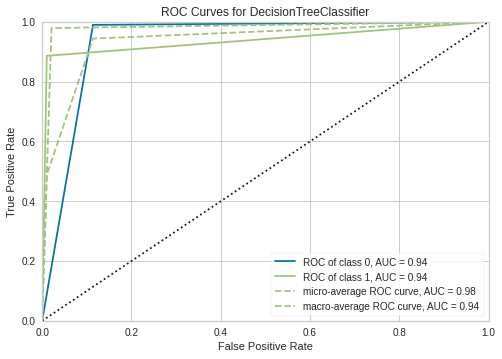

In [11]:
# Gráfico AUC-ROC 
classification.plot_model(classification_dt, plot = 'auc')

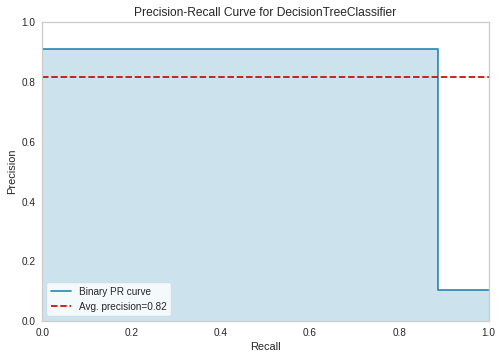

In [12]:
# Curva Precision Recall
classification.plot_model(classification_dt, plot = 'pr')

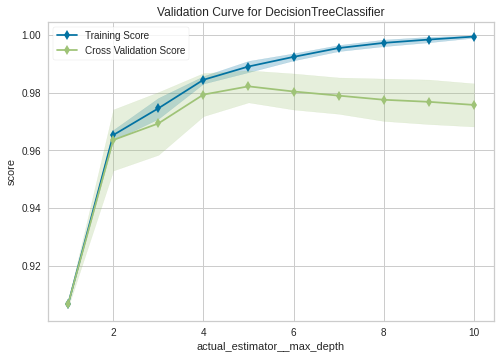

In [13]:
# Validation Curve
classification.plot_model(classification_dt, plot = 'vc')

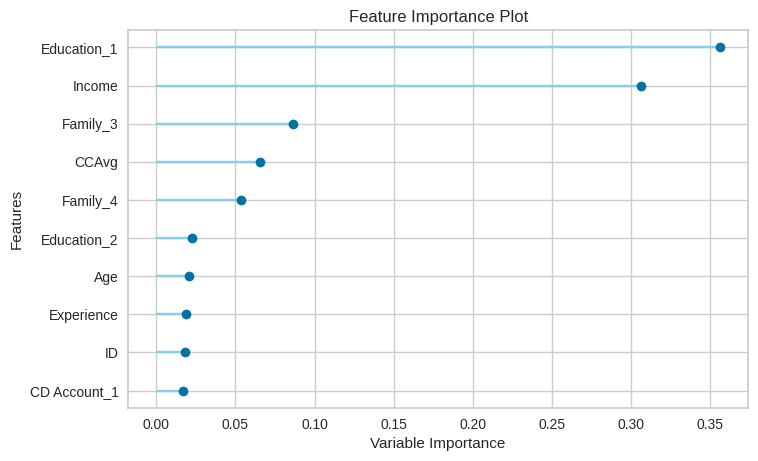

In [14]:
# Importância das Variáveis
classification.plot_model(classification_dt, plot = 'feature')

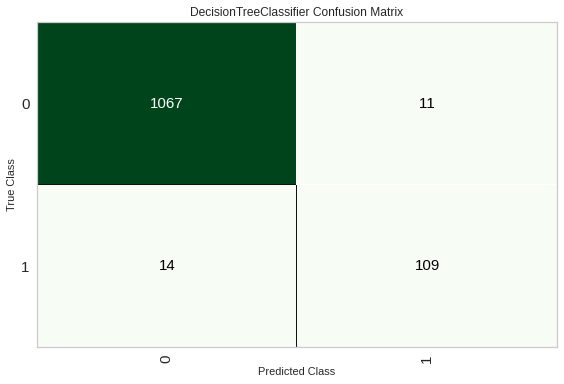

In [15]:
# Confusion Matrix
classification.plot_model(classification_dt, plot = 'confusion_matrix')

In [16]:
# Avaliação das Máquinas Preditivas
classification.evaluate_model(classification_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Interpretabilidade dos Modelos (das Máquinas Preditivas)

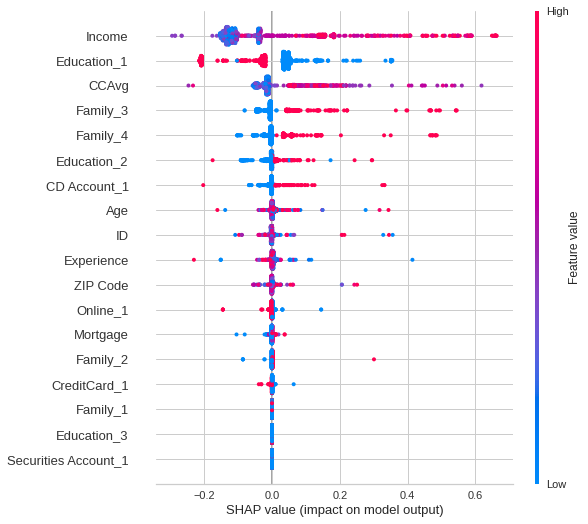

In [17]:
# Usando a Biblioteca SHAP
classification.interpret_model(classification_dt)

In [18]:
# Dados de Teste
test_data_classification = pd.read_csv('https://raw.githubusercontent.com/lakshay-arora/PyCaret-Example/master/datasets/loan_test_data.csv')

In [19]:
# Fazendo novas previsões
predictions = classification.predict_model(classification_dt, data=test_data_classification)

In [20]:
# Imprimindo na tela as novas predições
predictions

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Label,Score
0,118,58,33,61,92833,2,2.3,3,193,0,0,0,1,0,0,1.0
1,1817,45,19,91,92373,2,1.7,2,0,0,1,0,1,0,0,1.0
2,671,23,-1,61,92374,4,2.6,1,239,0,0,0,1,0,0,1.0
3,2994,65,40,20,92647,3,0.1,3,0,0,0,0,0,1,0,1.0
4,3265,67,41,114,95616,4,2.4,3,0,0,0,0,1,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4331,62,37,44,90401,1,1.1,3,0,0,0,0,0,0,0,1.0
996,3221,61,35,28,93302,2,0.2,3,135,0,0,0,1,0,0,1.0
997,1932,28,2,140,92122,2,2.0,1,0,0,0,0,1,0,0,1.0
998,4960,51,27,55,93014,1,1.6,2,197,0,1,0,1,0,0,1.0


In [21]:
# Salvando a Máquina Preditiva Final
classification.save_model(classification_dt, 'decision_tree_1')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='Personal Loan',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric...
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                         criterion='gini', 

In [22]:
# Carregando para Usar a Máquina Preditiva Final. Aqui é onde a Aplicação, depois de Criada, vai trabalhar...
dt_model = classification.load_model(model_name='decision_tree_1')

Transformation Pipeline and Model Successfully Loaded
